# Setup

## Find File Name

In [1]:
%load_ext autoreload
%autoreload 2

import os
import re
import functools
import spatialdata
import spatialdata_plot
import spatialdata_io as sdio
import numpy as np
import pandas as pd
import corescpy as cr

# File Paths
libid = "50006B"
ddd = "/mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library"
dir_data = F"/mnt/cho_lab/bbdata2/outputs/{panel}"  # data directory
out_dir = os.path.join(ddd, "outputs/TUQ97N/nebraska")  # output directory
file_mdf = os.path.join(ddd, "samples.csv")  # metadata
files = functools.reduce(lambda i, j: i + j, [[os.path.join(
    run, i) for i in os.listdir(os.path.join(
        dir_data, run))] for run in os.listdir(dir_data)])  # all data paths

# Metadata
col_inflamed, col_stricture, cso, col_sample, col_subject, col_condition = (
    "Inflammation", "Stricture", "Sample ID",
    "Sample", "Patient", "Condition")
key_uninfl, key_infl, key_stric = "Uninflamed", "Inflamed", "Stricture"
m_d = (pd.read_excel if file_mdf[-4:] == "xlsx" else pd.read_csv)(
    file_mdf, dtype={"Slide ID": str})
m_d.loc[:, col_condition] = m_d.apply(lambda x: "Stricture" if x[
    col_stricture].lower() in ["stricture", "yes"] else x[
        col_inflamed].capitalize(), axis=1)  # inflamation/stricture condition
m_d.loc[:, col_sample] = m_d[[col_condition, cso]].apply("-".join, axis=1)

# Find File Path & Condition-ID String
file_path = np.array(files)[np.where([libid == os.path.basename(
    x).split("__")[2].split("-")[0] for x in files])[0][0]]
lib = m_d.reset_index().set_index(cso).loc[libid][col_sample]


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

## Load Data

In [3]:
self = cr.Spatial(os.path.join(dir_data, file_path), library_id=lib)
if os.path.exists(os.path.join(out_dir, f"{lib}.h5ad")):  # processed object?
    self.update_from_h5ad(os.path.join(out_dir, f"{lib}.h5ad"))
self.get_layer("counts", inplace=True)  # start with integer counts data
self.adata



<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-007/output-XETG00189__0022407__50006B-TUQ97N-EA__20240411__205514/
         cell_feature_matrix.h5                                                                                    




Counts: Initial


	Observations: 116837

	Genes: 469







 AnnData object with n_obs × n_vars = 116837 × 469
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial', 'original_ix'
    obsm: 'spatial'
    layers: 'counts' 

                      gene_ids    feature_types   genome
gene_symbols                                           
ABCA7         ENSG00000064687  Gene Expression  Unknown
ACTA2         ENSG00000107796  Gene Expression  Unknown
ACTG2         ENSG00000163017  Gene Expression  Unknown
ADAM15        ENSG00000143537  Gene Expression  Unknown
ADAM28        ENSG00000042980  Gene Expression  Unknown 

 



col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="Sample"
col_b

SpatialData object with:
├── Images
│     └── 'morphology_focus': MultiscaleSpatialImage[cyx] (5, 34128, 51148), (5, 17064, 25574), (5, 8532, 12787), (5, 4266, 6393), (5, 2133, 3196)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (34128, 51148), (17064, 25574), (8532, 12787), (4266, 6393), (2133, 3196)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (34128, 51148), (17064, 25574), (8532, 12787), (4266, 6393), (2133, 3196)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (116837, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (116837, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (114734, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (78976, 469)
with coordinate systems:
▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), ce

# Plot

In [ ]:
# sdata.pl.render_shapes("cell_boundaries").pl.show()  # not working?
sdata.pl.render_labels("cell_labels").pl.show()
# sdata.pl.render_images("morphology_focus").pl.show()  # takes long

# See Transcripts Data

In [ ]:
points = self.adata.points["transcripts"].compute()
points

# Crop Data by Xenium Explorer Selection

## Xenium Explorer Selection File

In [4]:
# coord_suffix = "mucosa"
coord_suffix = "mucosa_CSF2"
dir_coord = os.path.join(out_dir, "coordinates", coord_suffix)  # coordinates

## Crop

In [ ]:
sdata = self.crop(os.path.join(dir_coord, libid + f"_{coord_suffix}.csv"))

# Workspace

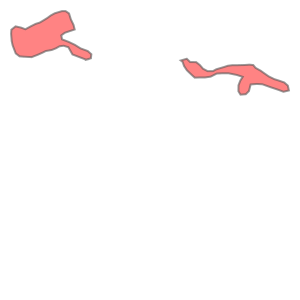

In [32]:
coords

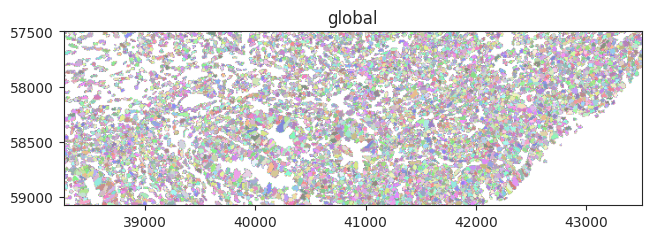

In [34]:
# import shapely

# s = "50336B"

coords = [os.path.join(dir_coord, s + f"_{coord_suffix}{i}.csv")
          for i in ["_1", "_2"]]
# print(f"\n\n{'*' * 40}\n{s}\n{'*' * 40}\n\n")
# file_path = np.array(files)[np.where([s == os.path.basename(
#     x).split("__")[2].split("-")[0] for x in files])[0][0]]
# lib = m_d.reset_index().set_index(cso).loc[s][col_sample]
# self = cr.Spatial(os.path.join(dir_data, file_path), library_id=lib)
# self.update_from_h5ad(os.path.join(out_dir, f"{lib}.h5ad"))
sdata = self.crop(coords)
sdata.pl.render_labels("cell_labels").pl.show()
self.adata = sdata
self.write(os.path.join(out_dir, f"{lib}_{coord_suffix}.h5ad"))

In [5]:
    sdata = self.crop(os.path.join(dir_coord, s + f"_{coord_suffix}.csv"))
    # sdata.pl.render_labels("cell_labels").pl.show()
    self.adata = sdata
    self.write(os.path.join(out_dir, f"{lib}_{coord_suffix}.h5ad"))

In [6]:
for s in ["50403B", "50006A", "50217B", "50217A",
          "50336B", "50336C", "50403A2", "50006B"]:
    print(f"\n\n{'*' * 40}\n{s}\n{'*' * 40}\n\n")
    file_path = np.array(files)[np.where([s == os.path.basename(
        x).split("__")[2].split("-")[0] for x in files])[0][0]]
    lib = m_d.reset_index().set_index(cso).loc[s][col_sample]
    self = cr.Spatial(os.path.join(dir_data, file_path), library_id=lib)
    self.update_from_h5ad(os.path.join(out_dir, f"{lib}.h5ad"))
    sdata = self.crop(os.path.join(dir_coord, s + f"_{coord_suffix}.csv"))
    # sdata.pl.render_labels("cell_labels").pl.show()
    self.adata = sdata
    self.write(os.path.join(out_dir, f"{lib}_{coord_suffix}.h5ad"))



****************************************
50403B
****************************************




<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-011/output-XETG00189__0010592__50403B-TUQ97N-EA__20240513__201050/
         cell_feature_matrix.h5                                                                                    




Counts: Initial


	Observations: 694033

	Genes: 469







 AnnData object with n_obs × n_vars = 694033 × 469
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial', 'original_ix'
    obsm: 'spatial'
    layers: 'counts' 

                      gene_ids    feature_types   genome
gene_symbols                                           
ABCA7         ENSG00000064687  Gene Expression  Unknown
ACTA2         ENSG00000107796  Gene Expression  Unknown
ACTG2         ENSG00000163017  Gene Expression  Unknown
ADAM15        ENSG00000143537  Gene Expression  Unknown
ADAM28        ENSG00000042980  Gene Expression  Unknown 

 



col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="Sample"
col_b

In [7]:
n_obs = {}
for s in ["50403B", "50006A", "50217B", "50217A",
          "50336B", "50336C", "50403A2", "50006B"]:
    print(f"\n\n{'*' * 40}\n{s}\n{'*' * 40}\n\n")
    file_path = np.array(files)[np.where([s == os.path.basename(
        x).split("__")[2].split("-")[0] for x in files])[0][0]]
    lib = m_d.reset_index().set_index(cso).loc[s][col_sample]
    self = cr.Spatial(os.path.join(dir_data, file_path), library_id=lib)
    n_obs[s] = self.rna.n_obs



****************************************
50403B
****************************************




<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-011/output-XETG00189__0010592__50403B-TUQ97N-EA__20240513__201050/
         cell_feature_matrix.h5                                                                                    


Counts: Initial


	Observations: 694033

	Genes: 469







 AnnData object with n_obs × n_vars = 694033 × 469
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial', 'original_ix'
    obsm: 'spatial'
    layers: 'counts'

In [8]:
n_obs

{'50403B': 694033,
 '50006A': 297656,
 '50217B': 814930,
 '50217A': 1038830,
 '50336B': 563427,
 '50336C': 387961,
 '50403A2': 212695,
 '50006B': 116837}

In [ ]:
# To Reload Past Cropping

# for s in ["50336B", "50336C", "50403B", "50006A", "50217B", "50217A",
#           "50403A2", "50006B"]:
#     print(f"\n\n{'*' * 40}\n{s}\n{'*' * 40}\n\n")
#     file_path = np.array(files)[np.where([s == os.path.basename(
#         x).split("__")[2].split("-")[0] for x in files])[0][0]]
#     lib = m_d.reset_index().set_index(cso).loc[s][col_sample]
#     self = cr.Spatial(os.path.join(dir_data, file_path), library_id=lib)
#     table = sc.read(os.path.join(out_dir, f"{lib}_{coord_suffix}.h5ad"))
#     sdata = copy.deepcopy(self.adata)
#     sdata = cr.pp.subset_spatial(
#         sdata, col_region=col_sample_id, col_cell_id="cell_id",
#         key_cell_id=table.obs["cell_id"].to_list())
#     sdata.pl.render_labels("cell_labels").pl.show()

## Descriptives

In [3]:
lib_list = ["50006A", "50217A", "50336B", "50403B", "50452B",
            "50006B", "50217B", "50336C", "50403A1", "50403A2", "50452A"]
n_obs, obs_dfs = {}, {}
for s in lib_list:
    print(f"\n\n{'*' * 40}\n{s}\n{'*' * 40}\n\n")
    file_path = np.array(files)[np.where([s == os.path.basename(
        x).split("__")[2].split("-")[0] for x in files])[0][0]]
    lib = m_d.reset_index().set_index(cso).loc[s][col_sample]
    self = cr.Spatial(os.path.join(dir_data, file_path), library_id=lib)
    n_obs_o = self.rna.n_obs  # original # of cells
    self.update_from_h5ad(os.path.join(out_dir, f"{lib}.h5ad"))
    # sdata.pl.render_labels("cell_labels").pl.show()
    n_obs[s] = pd.Series([lib, n_obs_o, self.rna.n_obs], index=[
        "Original", "Processed"])
    obs_dfs[s] = self.rna.obs.copy()
n_obs = pd.concat(n_obs)
obs_dfs = pd.concat(n_obs)



****************************************
50006A
****************************************




<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bbdata2/outputs/TUQ97N/CHO-007/output-XETG00189__0022407__50006A-TUQ97N-EA__20240411__205514/
         cell_feature_matrix.h5                                                                                    


In [ ]:
n_obs.to_xlsx(os.path.join(out_dir, f"meta_{'_'.join(lib_list)}.xlsx"))
obs_dfs.to_xlsx(os.path.join(out_dir, f"obs_{'_'.join(lib_list)}.xlsx"))
obs_dfs

In [ ]:
n_obs = n_obs.join(m_d.reset_index().set_index(cso))

In [ ]:
adatas = {}
for s in lib_list:
    file_path = np.array(files)[np.where([s == os.path.basename(
        x).split("__")[2].split("-")[0] for x in files])[0][0]]
    lib = m_d.reset_index().set_index(cso).loc[s][col_sample]
    adatas[x] = sc.read(os.path.join(out_dir, f"{lib}.h5ad"))

In [ ]:
[["transcript_counts", "control_probe_counts", "control_codeword_counts",
       "unassigned_codeword_counts", "deprecated_codeword_counts",
       "total_counts", "cell_area", "nucleus_area", "region",
       "nucleus_count"]]